In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Carga y visualización de datos

In [2]:
mnist = np.loadtxt("data/mnist1.5k.csv", delimiter=",")
print "dimension de los datos originales", mnist.shape
d=mnist[:,1:785]
c=mnist[:,0]

dimension de los datos originales (1500, 785)


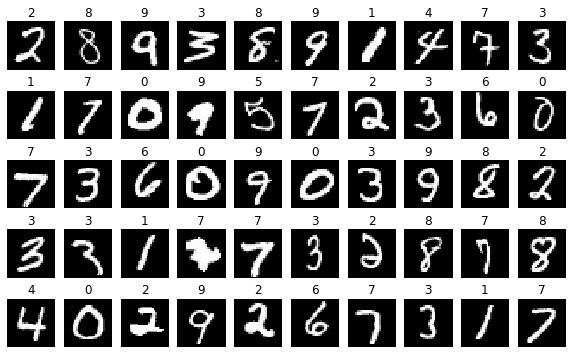

In [3]:
perm = np.random.permutation(range(d.shape[0]))[0:50]
random_imgs   = d[perm]
random_labels = c[perm] 
fig = plt.figure(figsize=(10,6))
for i in range(random_imgs.shape[0]):
    ax=fig.add_subplot(5,10,i+1)
    plt.imshow(random_imgs[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(random_labels[i]))
    ax.set_xticklabels([])
    ax.set_yticklabels([])

In [4]:
print "digito   número de imágenes"
for i in np.unique(c):
    print "   ",int(i), "   ", np.sum(c==i)

digito   número de imágenes
    0     150
    1     157
    2     186
    3     125
    4     151
    5     138
    6     152
    7     154
    8     141
    9     146


## Entrenamiento y predicción

Usamos el algoritmo de clasificación **Support Vector Machines** y el **Decision Tree** para tratar de identificar automáticamente los dígitos. Fíjate como dividimos primero las imágenes y las etiquetas en un 80% para train y un 20% para test. ¿Qué tal se comporta el algoritmo? ¿Clasifica bien los dígitos? ¿Qué dígitos clasifica peor? ¿Por qué crees que es?

In [6]:
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC

In [8]:
g = SVC(gamma=1., degree=3, C=.6)
test_size = 0.2
d_train, d_test, c_train, c_test = cross_validation.train_test_split(d, 
                                                                     c, 
                                                                     test_size=test_size, 
                                                                     random_state=np.random.randint(1,100))
g.fit(d_train, c_train)
print "accuracy in train", g.score(d_train, c_train)
print "accuracy in test ", g.score(d_test, c_test)

accuracy in train 0.918333333333
accuracy in test  0.126666666667


In [9]:
g = DecisionTreeClassifier(max_depth=2)
g.fit(d_train, c_train)
print "accuracy in train", g.score(d_train, c_train)
print "accuracy in test ", g.score(d_test, c_test)

accuracy in train 0.3175
accuracy in test  0.29


In [10]:
from sklearn.metrics import confusion_matrix
print confusion_matrix(c_test, g.predict(d_test))

[[ 0  6  4  0  0  0  0  0 18  0]
 [ 0 24  7  0  0  0  0  0  0  5]
 [ 0  3 24  0  0  0  0  0  7  4]
 [ 0  7  1  0  0  0  0  0  4 15]
 [ 0  3  4  0  0  0  0  0  1 30]
 [ 0 13  5  0  0  0  0  0  3  3]
 [ 0  1 18  0  0  0  0  0  1  7]
 [ 0  1  1  0  0  0  0  0  0 28]
 [ 0  4  2  0  0  0  0  0 16  5]
 [ 0  2  0  0  0  0  0  0  0 23]]
